## Table of Contents:

### 1. Import libraries and data
### 2. Security implications
### 3. Customer behaviors of different regions
### 4. Exclude low spending customers from df
### 5. Create customer profiles for targeted marketing
### 6. Distribution visuals for profiles 
### 7. Profile aggregation
### 8. Profiles by regions and departments
### Extra profile: Income
### Extra profile: Age x Family Structure
### 10. Export

## 1. Import libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy

In [2]:
# import dataset

# create path for dataset 

path = r'C:\Users\pears\Desktop\CF\Achievement 4\20230715 Instacart Basket Analysis'

# create filepath for file orders_products_customers_merged.pkl

filepath = os.path.join(path, '02 Data', 'prepared data', 'orders_products_customers_merged.pkl')

# assign df name for orders_products_customers_merged.pkl

opc_merge = pd.read_pickle(filepath)

## 2. Security implications 

opc_merge contains multiple PII data in columns: 
- first_name
- last_name
- gender
- state
- age
- num_of_dependants
- fam_status
- income

These columns individually may not be problematic but these columns consolidated raise privacy concerns. 

In [4]:
# remove column limit of output 

pd.options.display.max_columns = None

In [5]:
# remove row limit of output 

pd.options.display.max_rows = None

In [21]:
# checking all column names for customer information

opc_merge.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_days,order_days,max_order,loyalty_flag,mean_order_prices,loyalty_flag_spender,mean_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,Monday,10,New customer,6.367797,Low spender,20.259259,Non-frequent,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,3 South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,Monday,10,New customer,6.367797,Low spender,20.259259,Non-frequent,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,3 South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,Monday,10,New customer,6.367797,Low spender,20.259259,Non-frequent,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,3 South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,Monday,10,New customer,6.367797,Low spender,20.259259,Non-frequent,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,3 South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,Monday,10,New customer,6.367797,Low spender,20.259259,Non-frequent,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,3 South


## 3. Customer behaviors of different regions

### a. Create new column for regions 

In [3]:
# checking spelling of states

opc_merge['state'].value_counts().sort_index()

Alabama                 638634
Alaska                  649022
Arizona                 654536
Arkansas                636733
California              660419
Colorado                639810
Connecticut             623582
Delaware                637465
District of Columbia    614329
Florida                 629629
Georgia                 657084
Hawaii                  633439
Idaho                   607797
Illinois                633463
Indiana                 627779
Iowa                    626076
Kansas                  638010
Kentucky                632952
Louisiana               638171
Maine                   639163
Maryland                627261
Massachusetts           647017
Michigan                631632
Minnesota               648407
Mississippi             633111
Missouri                641310
Montana                 635826
Nebraska                626273
Nevada                  636686
New Hampshire           615970
New Jersey              628279
New Mexico              655180
New York

In [4]:
# for-loop if-statement: assign regions to states

result = []

for state in opc_merge['state']:
  if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append('1 Northeast')
  elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append('2 Midwest')
  elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append('3 South')
  elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result.append('4 West')
  else:
    result.append('error')

In [5]:
# input result in new column named 'region'

opc_merge['region'] = result

In [6]:
# count values of 'region' column; make sure no 'error'

opc_merge['region'].value_counts(dropna = False).sort_index()

1 Northeast     5728351
2 Midwest       7603861
3 South        10801796
4 West          8300481
Name: region, dtype: int64

Text(0.5, 1.0, 'Highest number of orders is placed in the South')

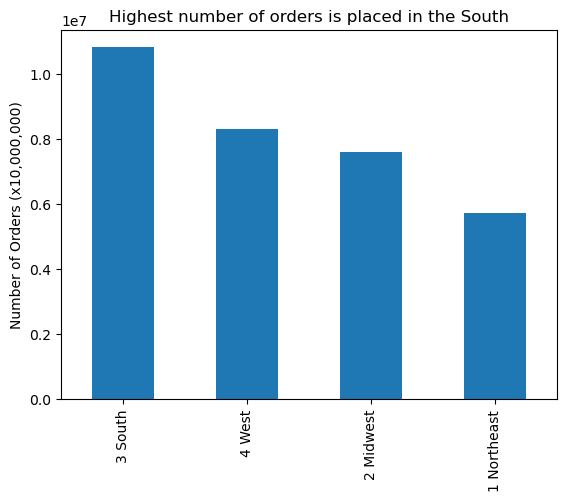

In [9]:
# bar chart of regions

opc_merge['region'].value_counts().plot.bar()

plt.ylabel('Number of Orders (x10,000,000)')
plt.title('Highest number of orders is placed in the South')

In [ ]:
# check if column was added 

opc_merge.head(1)

### b. Compare customer spending habits between regions 

In [11]:
# create crosstab to compare loyalty_flag_spender across regions

crosstab = pd.crosstab(opc_merge['region'], opc_merge['loyalty_flag_spender'], dropna = False)

In [12]:
crosstab

loyalty_flag_spender,High spender,Low spender
region,,
1 Northeast,18662,5709689
2 Midwest,29298,7574563
3 South,40643,10761153
4 West,31275,8269206


In [13]:
# count of orders by region

opc_merge['region'].value_counts().sort_index()

1 Northeast     5728351
2 Midwest       7603861
3 South        10801796
4 West          8300481
Name: region, dtype: int64

Text(0.5, 1.0, 'With both low- and high-spenders, South places the most orders, followed by West, Midwest and Northeast')

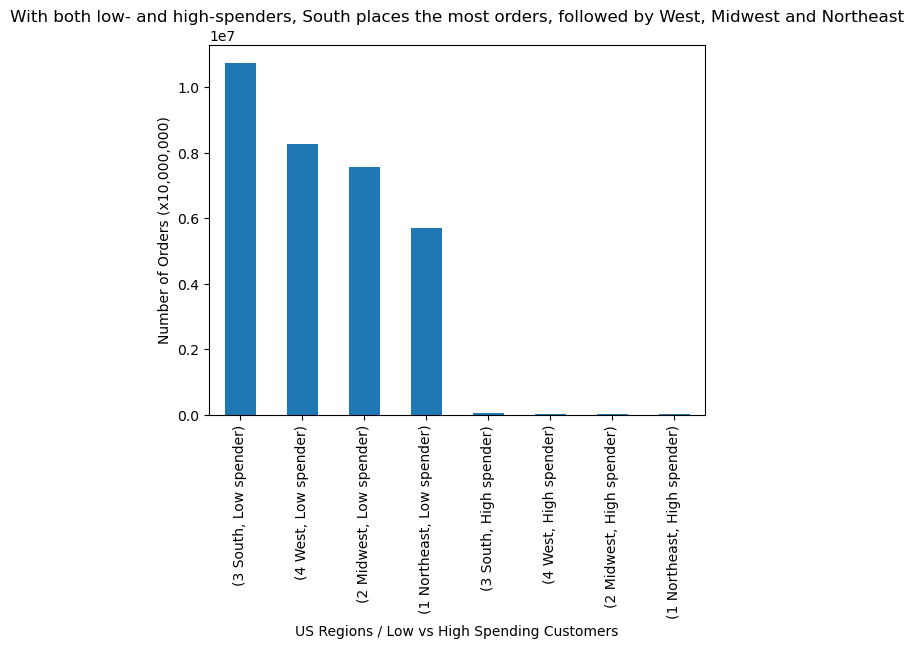

In [17]:
# bar graph of 'regions' x 'loyalty_flag_spender'

bar_regionsxspender = opc_merge[['region','loyalty_flag_spender']].value_counts().plot.bar()

plt.xlabel('US Regions / Low vs High Spending Customers')
plt.ylabel('Number of Orders (x10,000,000)')
plt.title('With both low- and high-spenders, South places the most orders, followed by West, Midwest and Northeast')

### c. Compare customer loyalty between regions

In [6]:
# group by combinations of 'region' and 'loyalty_flag' and count occurrences

opc_merge.groupby(['region', 'loyalty_flag']).size()

region       loyalty_flag    
1 Northeast  Loyal customer      1843745
             New customer        1101218
             Regular customer    2783388
2 Midwest    Loyal customer      2375982
             New customer        1473827
             Regular customer    3754052
3 South      Loyal customer      3408971
             New customer        2076187
             Regular customer    5316638
4 West       Loyal customer      2665261
             New customer        1598126
             Regular customer    4037094
dtype: int64

Text(0, 0.5, 'Number of Orders (x1,000,000)')

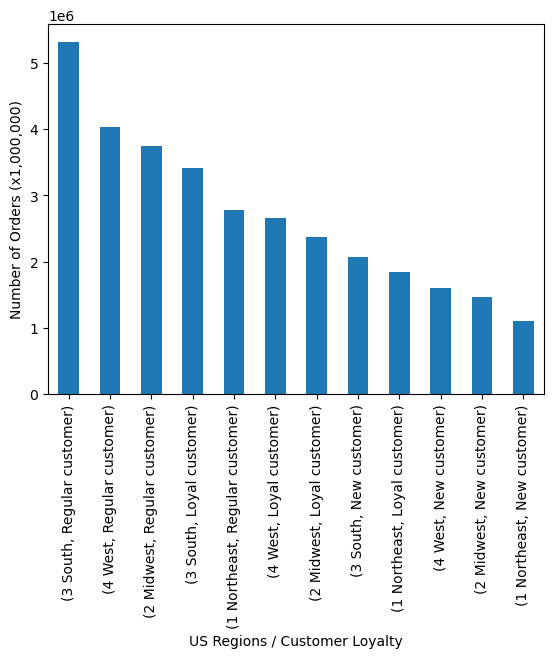

In [7]:
# bar graph of 'regions' x 'loyalty_flag'

bar_regionsxloyalty = opc_merge[['region','loyalty_flag']].value_counts().plot.bar()

plt.xlabel('US Regions / Customer Loyalty')
plt.ylabel('Number of Orders (x1,000,000)')

In [8]:
# grouping region and loyalty_flag to create stacked bar chart

regionxloyalty = opc_merge.groupby(['region', 'loyalty_flag']).size().unstack(fill_value=0)

In [ ]:
# stacked bar chart of 'regions' x 'loyalty_flag' 

bar_stacked_regionxloyalty = opc_merge.plot.bar(stacked = True, title = 'Customer Loyalty by Region')

## 4. Exclude low spending customers from dataset 

steps: 

- make if-statement and new flag column for low spending customers ('max_order' <=5 orders)
- create new subset df excluding these customers 
- export df as pickle 

In [3]:
# for-loop if-statement: assign 'drop' to customers with <=5 'max_order'

result = []

for max_order in opc_merge['max_order']:
  if max_order <=5:
    result.append('exclude')
  else:
    result.append('keep')

In [4]:
# input result in new column named 'low_activity_customers'

opc_merge['low_activity_customers'] = result

In [6]:
# checking if new column was added 

opc_merge.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,_merge,low_activity_customers
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both,keep


In [25]:
# counting keep vs exclude 

opc_merge['low_activity_customers'].value_counts()

keep       30199150
exclude     2235339
Name: low_activity_customers, dtype: int64

In [26]:
# creating a subset df for 'keep' customers 

keep = opc_merge.loc[opc_merge['low_activity_customers']=='keep']

In [27]:
# checking that row count of new df matches 'keep' count of above value_count() 

keep.shape

(30199150, 36)

In [28]:
# exporting subset df 'keep' 

keep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_keep.pkl'))

## 5. Create customer profiles for targeted marketing

### a. Import new 'keep' df 

In [2]:
# import new keep df

# create path for dataset 

path = r'C:\Users\pears\Desktop\CF\Achievement 4\20230715 Instacart Basket Analysis'

# create filepath for file orders_products_customers_merged_keep.pkl

filepath = os.path.join(path, '02 Data', 'prepared data', 'orders_products_customers_merged_keep.pkl')

# assign df name for orders_products_customers_merged_keep.pkl

opc_merge_keep = pd.read_pickle(filepath)

### b. Create a small df sample

Creating a sample of df opc_merge because keep getting "not enough memory" error messages after running the for-loop statements

In [5]:
# assigning random values to create a 70/30 sample

np.random.seed(4)
dev = np.random.rand(len(opc_merge_keep)) <= 0.7

In [6]:
# splitting into two sample groups, small and big

big = opc_merge_keep[dev]
small = opc_merge_keep[~dev]

In [7]:
len(dev)

30199150

In [8]:
len(small)

9058349

In [9]:
len(big)

21140801

In [10]:
len(small)+len(big)

30199150

In [12]:
len(opc_merge_keep)

30199150

In [13]:
# make new df 

opc_merge_keep_sample = small

In [14]:
# checking all columns are still there 

opc_merge_keep_sample.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,num_of_dependants,fam_status,income,_merge,region,low_activity_customers
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2019-02-17,3,married,40423,both,3 South,keep


In [15]:
# checking if number of rows match above count

opc_merge_keep_sample.shape

(9058349, 36)

In [16]:
# exporting subset sample df 'opc_merge_keep_sample' 

opc_merge_keep_sample.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_keep_smallsample.pkl'))

### c. Import new small df sample

In [8]:
# import new keep df

# create path for dataset 

path = r'C:\Users\pears\Desktop\CF\Achievement 4\20230715 Instacart Basket Analysis'

# create filepath for file orders_products_customers_merged_keep_smallsample.pkl

filepath = os.path.join(path, '02 Data', 'prepared data', 'orders_products_customers_merged_keep_smallsample.pkl')

# assign df name for orders_products_customers_merged_keep_smallsample.pkl

opc_mkss = pd.read_pickle(filepath)

### d. Profile 1: age group

In [3]:
# for-loop if-statement: assign groups to age

result = [] 

for age in opc_mkss['age']:
  if age >18 and age <=24:
    result.append('18-24')
  elif age <=34:
    result.append('25-34')
  elif age <=44:
    result.append('35-44')
  elif age <=54:
    result.append('45-54')
  elif age <=64:
    result.append('55-64')
  elif age >=65:
    result.append('65+')
  else:
    result.append('error')

In [4]:
# input result in new column named 'age_group'

opc_mkss['age_group'] = result

In [5]:
# count of each group 

opc_mkss['age_group'].value_counts().sort_index()

18-24     859819
25-34    1553792
35-44    1415198
45-54    1427924
55-64    1404826
65+      2396790
Name: age_group, dtype: int64

### c. Profile 2: family structure

In [9]:
# group by combinations of 'fam_status', 'num_of_dependants', 'age_group' and count occurrences

opc_mkss.groupby(['age_group', 'fam_status', 'num_of_dependants']).size()

age_group  fam_status                        num_of_dependants
18-24      living with parents and siblings  1                    112314
                                             2                    109568
                                             3                    106397
           married                           1                    110305
                                             2                    102880
                                             3                    111517
           single                            0                    206838
25-34      living with parents and siblings  1                     36560
                                             2                     32559
                                             3                     36910
           married                           1                    341187
                                             2                    357300
                                             3               

Profiles to create:

- cohab with dependents (18-34)
- single no dependents (18-65+)
- married with dependents (18-65+)
- divorced/widowed no dependents (55-65+)

In [7]:
# for-loop if-statement: assign criterias

result = []

for index, row in opc_mkss.iterrows():
    fam_status = row['fam_status']
    num_of_dependants = row['num_of_dependants'] 

    if fam_status == 'single':
        result.append('single with no dependents')
    elif fam_status == 'divorced/widowed':
        result.append('divorced/widowed no dependents')
    elif fam_status == 'married' and num_of_dependants >=1:
        result.append('married with dependents')
    elif fam_status == 'living with parents and siblings' and num_of_dependants >=1:
        result.append('cohab with dependents')
    else:
        result.append('NA')

In [8]:
# input result in new column named 'fam_structure'

opc_mkss['fam_structure'] = result

In [9]:
# count of each group 

opc_mkss['fam_structure'].value_counts()

married with dependents           6358549
single with no dependents         1491423
divorced/widowed no dependents     774069
cohab with dependents              434308
Name: fam_structure, dtype: int64

In [10]:
opc_mkss.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,region,low_activity_customers,age_group,fam_structure,department,_merge,age_income_status,income_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,3 South,keep,25-34,married with dependents,beverages,both,young low income,low income


## 6. Distribution visuals of profiles  

### a. Profile 1: age group

Text(0.5, 1.0, '65+ age group places the most orders')

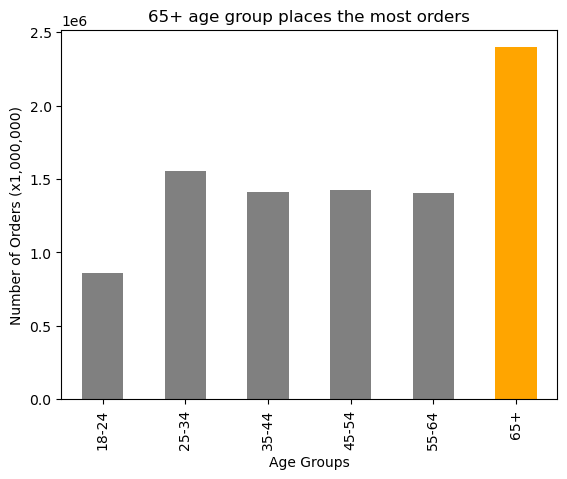

In [11]:
# bar chart for 'age_group'

opc_mkss['age_group'].value_counts().sort_index().plot.bar(color=['gray','gray','gray','gray','gray','orange'])

plt.xlabel('Age Groups')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('65+ age group places the most orders')

Text(0.5, 1.0, '65+ age group places the most orders')

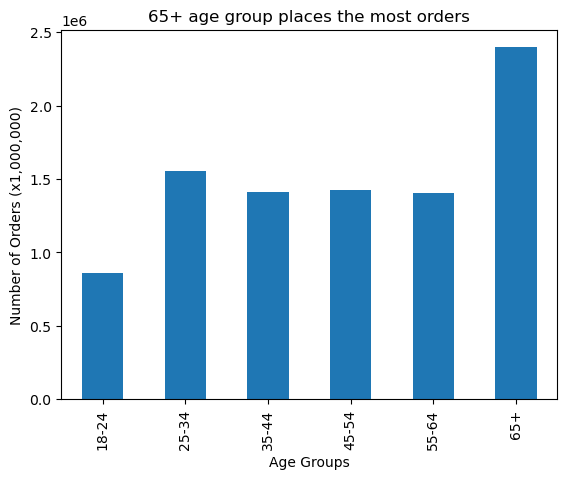

In [72]:
# bar chart for 'age_group' without color

opc_mkss['age_group'].value_counts().sort_index().plot.bar()

plt.xlabel('Age Groups')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('65+ age group places the most orders')

### b. Profile 2: family structure

Text(0.5, 1.0, 'Married couples with dependents places the most orders, spanning from ages 18~65+')

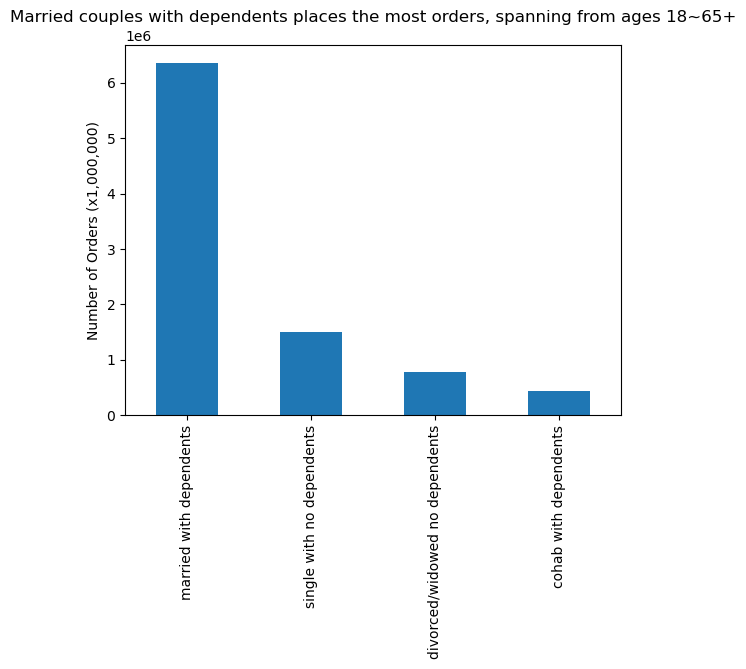

In [73]:
# bar chart for 'fam_structure'

opc_mkss['fam_structure'].value_counts().plot.bar()

plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Married couples with dependents places the most orders, spanning from ages 18~65+')

In [ ]:
# bar chart for 'fam_structure' without color

opc_mkss['fam_structure'].value_counts().plot.bar(color=['orange','gray','gray','gray'])

plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Married couples with dependents places the most orders, spanning from ages 18~65+')

## 7. Profile aggregation

Aggregate mean, min, and max variables on a profile level for usage frequency and expenditure

### a. Profile 1: age group

In [14]:
# usage frequency: mean, min, max of 'days_since_prior_order' grouped by 'age_group'

opc_mkss.groupby('age_group').agg({'days_since_prior_order': ['mean', 'median', 'min', 'max']})

days_since_prior_order                  
                            mean median  min   max
age_group                                         
18-24                  10.553658    7.0  0.0  30.0
25-34                  10.701698    7.0  0.0  30.0
35-44                  10.606422    7.0  0.0  30.0
45-54                  10.629001    7.0  0.0  30.0
55-64                  10.676486    7.0  0.0  30.0
65+                    10.616221    7.0  0.0  30.0

NOTE:

Right skewed, meaning the distribution is leaning towards smaller quantity of days 

In [15]:
# expenditure: mean, min, max of 'prices' grouped by 'age_group'

opc_mkss.groupby('age_group').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                  
               mean median  min   max
age_group                            
18-24      7.792430    7.4  1.0  25.0
25-34      7.776215    7.3  1.0  25.0
35-44      7.792197    7.4  1.0  25.0
45-54      7.793327    7.4  1.0  25.0
55-64      7.790936    7.4  1.0  25.0
65+        7.797468    7.4  1.0  25.0

In [16]:
# order time: mean, min, max of 'order_hour_of_day' grouped by 'age_group'

opc_mkss.groupby('age_group').agg({'order_hour_of_day': ['mean', 'median', 'min', 'max']})

order_hour_of_day               
                       mean median min max
age_group                                 
18-24             13.377371   13.0   0  23
25-34             13.385790   13.0   0  23
35-44             13.417442   13.0   0  23
45-54             13.422177   13.0   0  23
55-64             13.405814   13.0   0  23
65+               13.402025   13.0   0  23

In [17]:
# order day: mean, min, max of 'order_day_of_week' grouped by 'age_group'

opc_mkss.groupby('age_group').agg({'order_day_of_week': ['mean', 'median', 'min', 'max']})

order_day_of_week               
                       mean median min max
age_group                                 
18-24              2.746818    3.0   0   6
25-34              2.728612    3.0   0   6
35-44              2.736166    3.0   0   6
45-54              2.749844    3.0   0   6
55-64              2.746440    3.0   0   6
65+                2.750125    3.0   0   6

### b. Profile 2: family structure

In [19]:
# usage frequency: mean, min, max of 'days_since_prior_order' grouped by 'fam_structure'

opc_mkss.groupby('fam_structure').agg({'days_since_prior_order': ['mean', 'median', 'min', 'max']})

days_since_prior_order                  
                                                 mean median  min   max
fam_structure                                                          
cohab with dependents                       10.587257    7.0  0.0  30.0
divorced/widowed no dependents              10.559352    7.0  0.0  30.0
married with dependents                     10.649382    7.0  0.0  30.0
single with no dependents                   10.625483    7.0  0.0  30.0

NOTE:

Right skewed, meaning the distribution is leaning towards smaller quantity of days 

In [20]:
# expenditure: mean, min, max of 'prices' grouped by 'fam_structure'

opc_mkss.groupby('fam_structure').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                  
                                    mean median  min   max
fam_structure                                             
cohab with dependents           7.806203    7.4  1.0  25.0
divorced/widowed no dependents  7.804206    7.4  1.0  25.0
married with dependents         7.790513    7.4  1.0  25.0
single with no dependents       7.780913    7.4  1.0  25.0

In [21]:
# order time: mean, min, max of 'order_hour_of_day' grouped by 'fam_structure'

opc_mkss.groupby('fam_structure').agg({'order_hour_of_day': ['mean', 'median', 'min', 'max']})

order_hour_of_day               
                                            mean median min max
fam_structure                                                  
cohab with dependents                  13.390384   13.0   0  23
divorced/widowed no dependents         13.421341   13.0   0  23
married with dependents                13.400801   13.0   0  23
single with no dependents              13.406975   13.0   0  23

In [22]:
# order day: mean, min, max of 'order_day_of_week' grouped by 'fam_structure'

opc_mkss.groupby('fam_structure').agg({'order_day_of_week': ['mean', 'median', 'min', 'max']})

order_day_of_week               
                                            mean median min max
fam_structure                                                  
cohab with dependents                   2.747714    3.0   0   6
divorced/widowed no dependents          2.756585    3.0   0   6
married with dependents                 2.744859    3.0   0   6
single with no dependents               2.728621    3.0   0   6

## 8. Profiles by regions and departments

### a. Profile 1: age group x regions

Text(0.5, 1.0, 'Similar age distribution across the regions; only differed by volume')

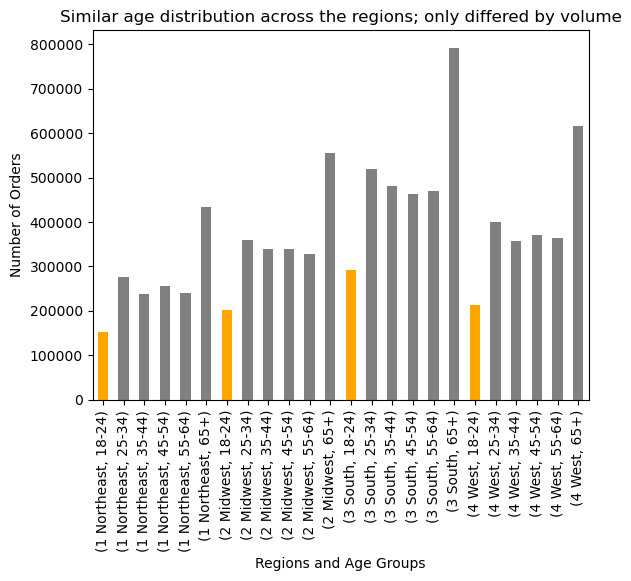

In [13]:
# bar chart of 'age_group' grouped by 'region'

bar_regions_agegroup = opc_mkss[['region','age_group']].value_counts().sort_index().plot.bar(color=['orange', 'gray', 'gray', 'gray', 'gray', 'gray','orange', 'gray', 'gray', 'gray', 'gray', 'gray','orange', 'gray', 'gray', 'gray', 'gray', 'gray','orange', 'gray', 'gray', 'gray', 'gray', 'gray'])

plt.xlabel('Regions and Age Groups')
plt.ylabel('Number of Orders')
plt.title('Similar age distribution across the regions; only differed by volume')

In [14]:
# stacked bar graph of 'age_group' grouped by 'region' 
# creating a grouping 

regionxagegroup = opc_mkss.groupby(['region','age_group']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Highest number of orders placed in the South, by 65+ age group')

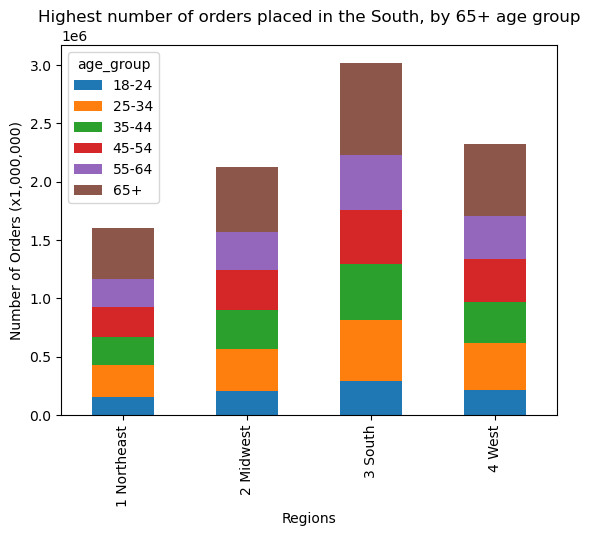

In [15]:
# stacked bar graph of 'age_group' grouped by 'region' 

barstacked_region_agegroup = regionxagegroup.plot.bar(stacked = True)

plt.xlabel('Regions')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Highest number of orders placed in the South, by 65+ age group')

### b. Profile 2: family structure x regions

Text(0.5, 1.0, 'Similar family structure distribution across the regions; only differed by volume')

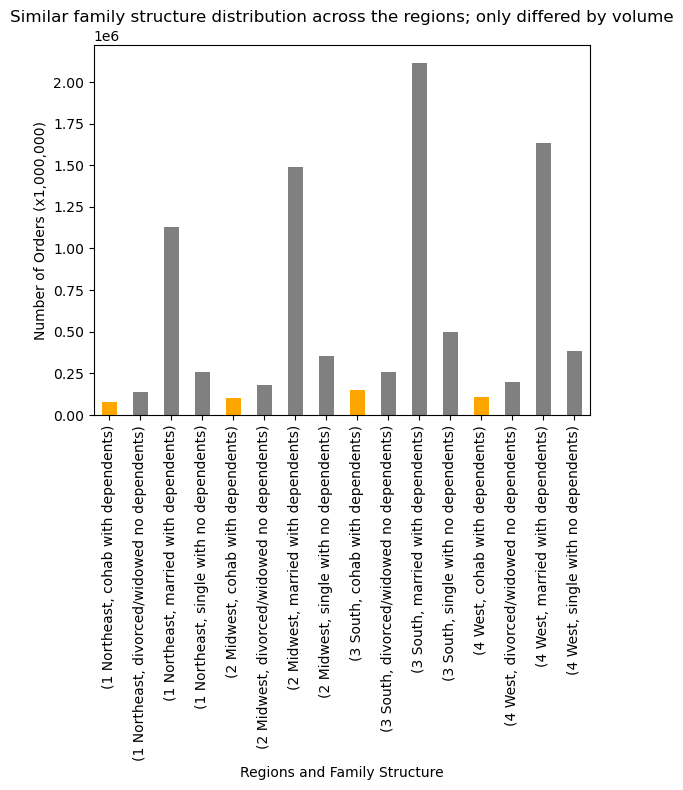

In [16]:
# bar chart of 'fam_structure' grouped by 'region'

bar_regions_famstructure = opc_mkss[['region','fam_structure']].value_counts().sort_index().plot.bar(color=['orange','gray','gray','gray','orange','gray','gray','gray','orange','gray','gray','gray','orange','gray','gray','gray'])

plt.xlabel('Regions and Family Structure')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Similar family structure distribution across the regions; only differed by volume')

In [45]:
opc_mkss.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_days,order_days,max_order,loyalty_flag,mean_order_prices,loyalty_flag_spender,mean_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,low_activity_customers,age_group,fam_structure
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,Monday,10,New customer,6.367797,Low spender,20.259259,Non-frequent,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,3 South,keep,25-34,married with dependents


In [23]:
# stacked bar graph of 'fam_structure' grouped by 'region' 
# creating a grouping 

regionxfamstructure = opc_mkss.groupby(['region','fam_structure']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Highest number of orders placed by married couples with dependents across all regions')

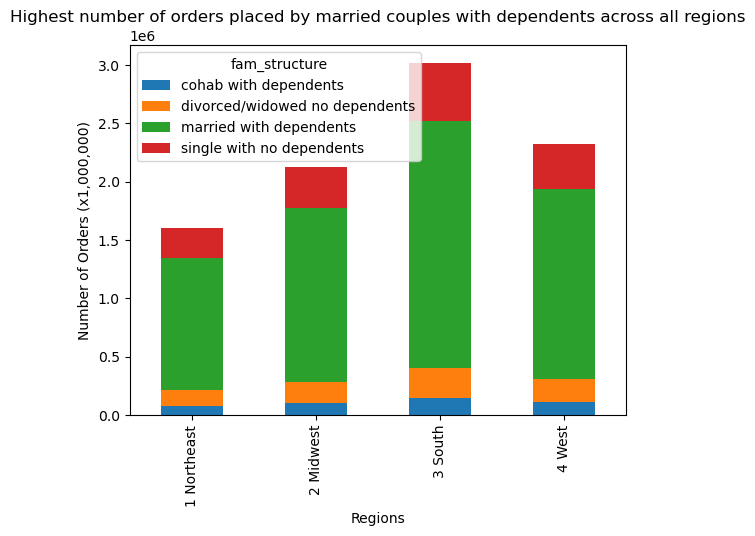

In [25]:
# stacked bar graph of 'age_group' grouped by 'region' 

barstacked_region_famstructure = regionxfamstructure.plot.bar(stacked = True)

plt.xlabel('Regions')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Highest number of orders placed by married couples with dependents across all regions')

### c. Profile 1: age group x departments

In [36]:
# import department .csv

# create filepath for file orders_products_customers_merged.pkl

filepath = os.path.join(path, '02 Data', 'prepared data', 'departments_wrangled.csv')

# assign df name for orders_products_customers_merged.pkl

dept = pd.read_csv(filepath)

In [37]:
dept

,department_id,department
0,1.0,frozen
1,2.0,other
2,3.0,bakery
3,4.0,produce
4,5.0,alcohol
5,6.0,international
6,7.0,beverages
7,8.0,pets
8,9.0,dry goods pasta
9,10.0,bulk


In [42]:
# delete existing column '_merge'

opc_mkss.drop(columns = ['_merge'], inplace=True)

In [63]:
# merge dept to opc_mkss

opc_mkss = opc_mkss.merge(dept, on = ['department_id'], indicator = True, how = 'left')

In [64]:
# checking merge + new column

opc_mkss.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_days,order_days,max_order,loyalty_flag,mean_order_prices,loyalty_flag_spender,mean_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,region,low_activity_customers,age_group,fam_structure,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,Monday,10,New customer,6.367797,Low spender,20.259259,Non-frequent,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,3 South,keep,25-34,married with dependents,beverages,both


In [65]:
# stacked bar graph of 'age_group' grouped by 'department' 
# creating a grouping 

deptxagegroup = opc_mkss.groupby(['department','age_group']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Departments by Age Groups')

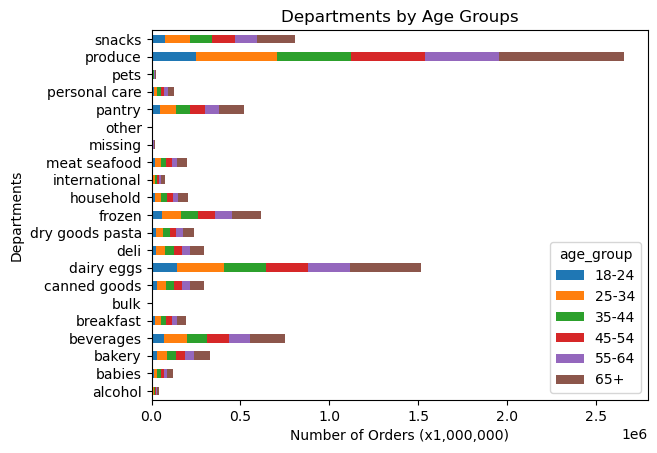

In [69]:
# stacked bar graph of 'age_group' grouped by 'department'

barstacked_dept_agegroup = deptxagegroup.plot.barh(stacked = True)

plt.xlabel('Number of Orders (x1,000,000)')
plt.ylabel('Departments')
plt.title('Departments by Age Groups')

### d. Profile 1: family structure x departments

In [20]:
# stacked bar graph of 'fam_structure' grouped by 'department' 
# creating a grouping 

deptxfamstructure = opc_mkss.groupby(['department','fam_structure']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Departments by Family Structure')

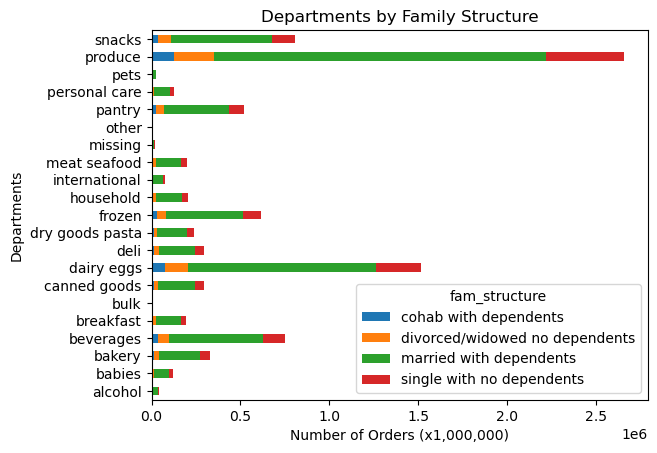

In [21]:
# stacked bar graph of 'fam_structure' grouped by 'department'

barstacked_dept_agegroup = deptxfamstructure.plot.barh(stacked = True)

plt.xlabel('Number of Orders (x1,000,000)')
plt.ylabel('Departments')
plt.title('Departments by Family Structure')

## Extra profile: Income 

### a. create a profile for age x income 

Based on scatterplot of age and income, there are clear groupings of age and income:

- age: 18-39 (younger)
    - low income: 0-99,999
    - mid income: 100,000-199,999
    - high income: 200,000-400,000
- age: 40-85 (older)
    - low income: 0-179,999
    - mid income: 180,000-299,999
    - high income: 300,000-600,000

In [12]:
# for-loop if-statement: assign criterias

result = []

for index, row in opc_mkss.iterrows():
    income = row['income']
    age = row['age'] 

    if (18 <= age <= 39) and (0 <= income <= 99999):
        result.append('younger low income')
    elif (18 <= age <= 39) and (100000 <= income <= 199999):
        result.append('younger mid income')
    elif (18 <= age <= 39) and (200000 <= income <= 400000):
        result.append('younger high income')
    elif (40 <= age <= 85) and (0 <= income <= 179999):
        result.append('older low income')
    elif (40 <= age <= 85) and (180000 <= income <= 299999):
        result.append('older mid income')
    elif (40 <= age <= 85) and (300000 <= income <= 600000):
        result.append('older high income')
    else:
        result.append('NA')

In [13]:
# input result in new column named 'age_income'

opc_mkss['age_income_status'] = result

In [14]:
# count of each group 

opc_mkss['age_income_status'].value_counts().sort_index()

older high income        23125
older low income       5866911
older mid income         46377
younger high income      11589
younger low income     3020502
younger mid income       89845
Name: age_income_status, dtype: int64

In [15]:
# for-loop if-statement: assign criterias
# excluding age from criteria name

result = []

for index, row in opc_mkss.iterrows():
    income = row['income']
    age = row['age'] 

    if (18 <= age <= 39) and (0 <= income <= 99999):
        result.append('low income')
    elif (18 <= age <= 39) and (100000 <= income <= 199999):
        result.append('mid income')
    elif (18 <= age <= 39) and (200000 <= income <= 400000):
        result.append('high income')
    elif (40 <= age <= 85) and (0 <= income <= 179999):
        result.append('low income')
    elif (40 <= age <= 85) and (180000 <= income <= 299999):
        result.append('mid income')
    elif (40 <= age <= 85) and (300000 <= income <= 600000):
        result.append('high income')
    else:
        result.append('NA')

In [16]:
# input result in new column named 'age_income'

opc_mkss['income_status'] = result

In [17]:
# count of each group 

opc_mkss['income_status'].value_counts().sort_index()

high income      34714
low income     8887413
mid income      136222
Name: income_status, dtype: int64

### b. visuals: age x income status

Text(0.5, 1.0, 'Most orders placed by young and old low income')

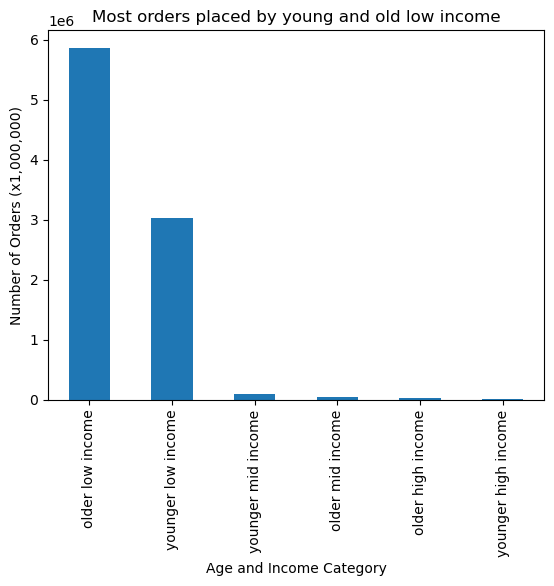

In [22]:
# bar chart; age x income status

opc_mkss['age_income_status'].value_counts().plot.bar()

plt.xlabel('Age and Income Category')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Most orders placed by young and old low income')

Text(0.5, 1.0, 'Majority of orders are placed by low income customers')

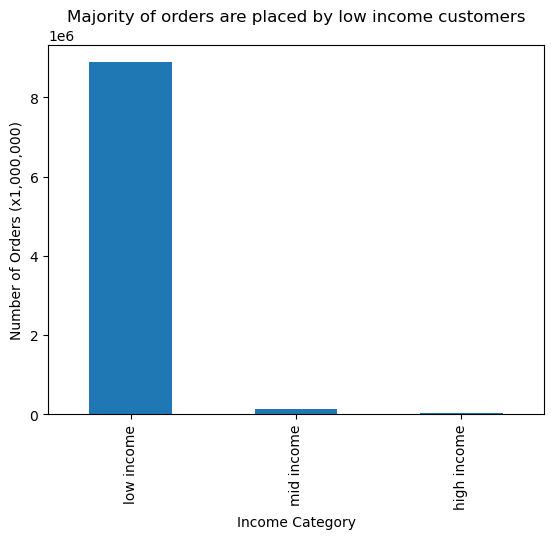

In [112]:
# bar chart; income status

opc_mkss['income_status'].value_counts().plot.bar()

plt.xlabel('Income Category')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Majority of orders are placed by low income customers')

### c. visuals: income status x regions

In [18]:
# stacked bar graph of 'age_income_status' grouped by 'region'
# creating a grouping 

regionxageincome = opc_mkss.groupby(['region','age_income_status']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Distribution of orders by age group income category')

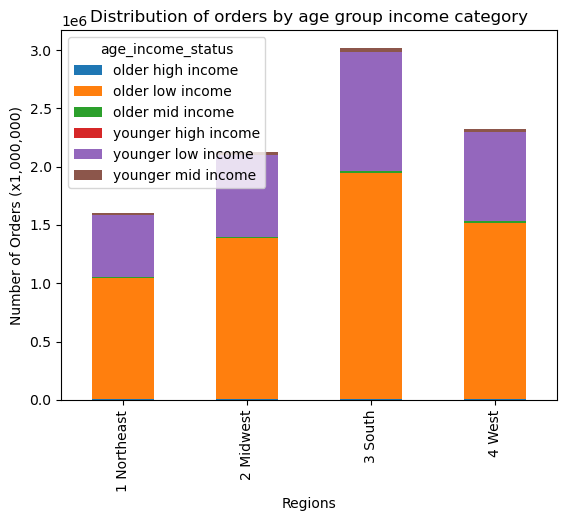

In [19]:
# stacked bar graph of 'age_income_status' grouped by 'region' 

barstacked_region_ageincome = regionxageincome.plot.bar(stacked = True)

plt.xlabel('Regions')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Distribution of orders by age group income category')

In [20]:
# stacked bar graph of 'income_status' grouped by 'region'
# creating a grouping 

regionxincome = opc_mkss.groupby(['region','income_status']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Majority of orders are placed by low income customers across regions')

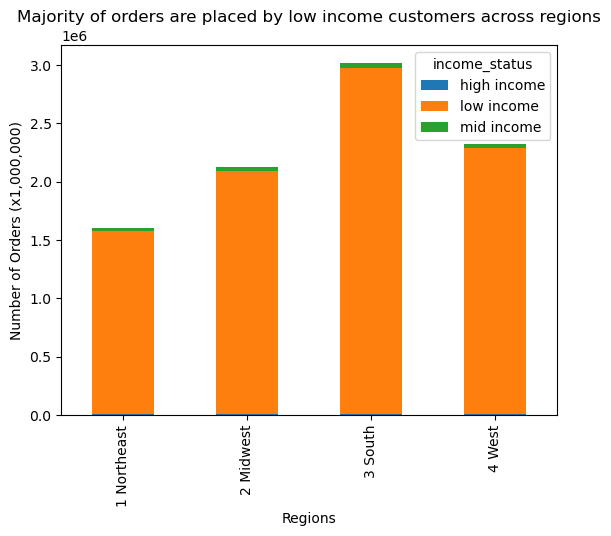

In [21]:
# stacked bar graph of 'income_status' grouped by 'region' 

barstacked_region_income = regionxincome.plot.bar(stacked = True)

plt.xlabel('Regions')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Majority of orders are placed by low income customers across regions')

### d. income status x departments

In [ ]:
# stacked bar graph of 'age_income_status' grouped by 'department'
# creating a grouping 

deptxageincome = opc_mkss.groupby(['department','age_income_status']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Distribution of orders by age and income status')

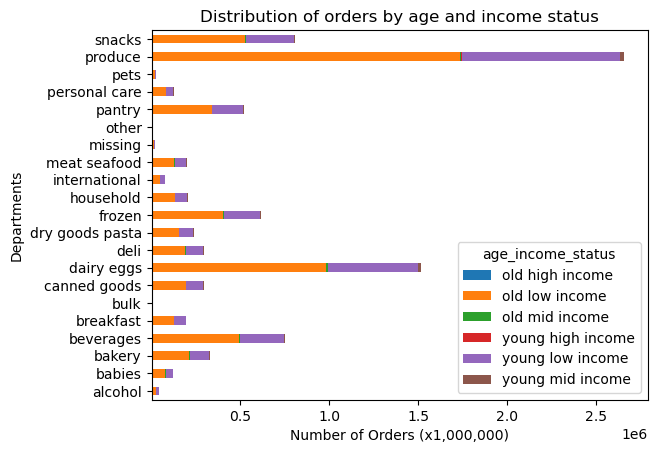

In [108]:
# stacked bar graph of 'age_income_status' grouped by 'department' 

barstacked_dept_ageincome = deptxageincome.plot.barh(stacked = True)

plt.xlabel('Number of Orders (x1,000,000)')
plt.ylabel('Departments')
plt.title('Distribution of orders by age and income status')

In [107]:
# stacked bar graph of 'income_status' grouped by 'department'
# creating a grouping 

deptxincome = opc_mkss.groupby(['department','income_status']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Distribution of orders by income status')

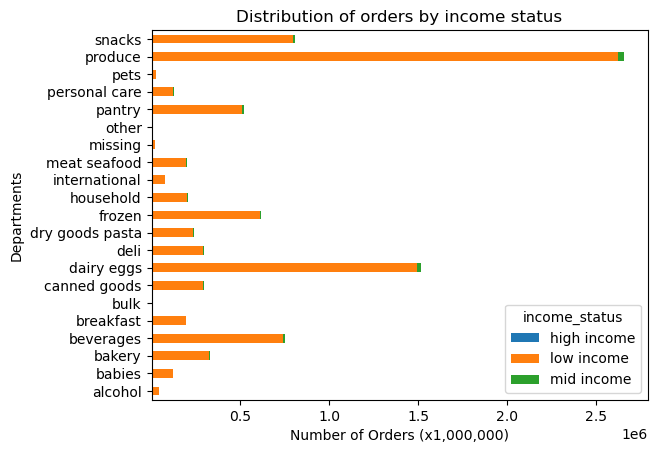

In [110]:
# stacked bar graph of 'income_status' grouped by 'department' 

barstacked_dept_income = deptxincome.plot.barh(stacked = True)

plt.xlabel('Number of Orders (x1,000,000)')
plt.ylabel('Departments')
plt.title('Distribution of orders by income status')

## Extra profile: Age x Family Structure

In [11]:
# stacked bar graph of 'age_group' grouped by 'fam_structure'
# creating a grouping 

agegroupxfamstructure = opc_mkss.groupby(['fam_structure','age_group']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Distribution between family structure and age groups')

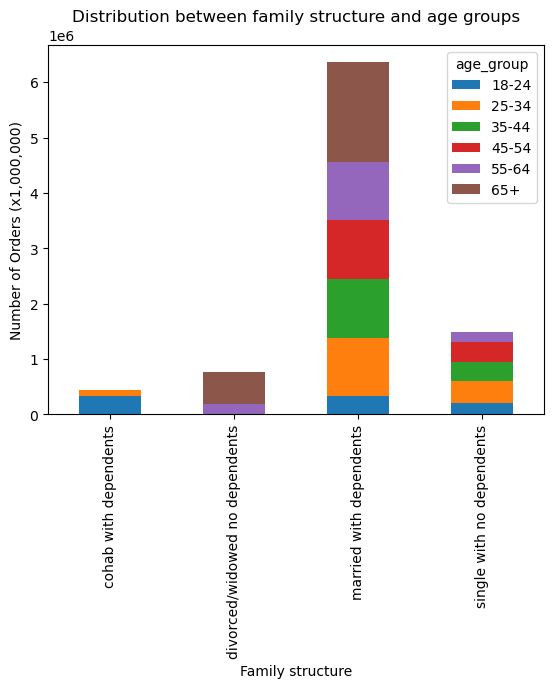

In [14]:
# stacked bar graph of 'age_group' grouped by 'fam_structure'

barstacked_age_fam = agegroupxfamstructure.plot.bar(stacked = True)

plt.xlabel('Family structure')
plt.ylabel('Number of Orders (x1,000,000)')
plt.title('Distribution between family structure and age groups')

## 10. Export

In [111]:
# exporting opc_mkss with new age_income_status and income_status 

opc_mkss.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged_keep_smallsample.pkl'))